This notebook implements autoencoder with sparse encoding. With 100 activation units in the hidden layer. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.0005
num_in = 784
num_h = 5
num_out = 784
num_epochs = 100
img_size = [28,28]
batch_size = 100

In [5]:
x = tf.placeholder(tf.float32, [None,num_in])

In [6]:
rho = tf.fill([1,num_h], 0.01)

In [7]:
weights = {
    'in':tf.Variable(tf.random_normal([num_in, num_h])),
    'h':tf.Variable(tf.random_normal([num_h, num_out]))
}

biases = {
    'in':tf.Variable(tf.random_normal([1,num_h])),
    'h':tf.Variable(tf.random_normal([1,num_out]))
}

In [8]:
h_layer = tf.add(tf.matmul(x, weights['in']), biases['in'])
h_layer = tf.nn.sigmoid(h_layer)
out_layer = tf.add(tf.matmul(h_layer, weights['h']), biases['h'])

In [9]:
rho_cap = tf.Variable(tf.zeros([1, num_h]))
rho_cap = rho_cap + h_layer/mnist.train.num_examples

In [10]:
loss_op = tf.losses.mean_squared_error(out_layer, x)

In [11]:
#optimizer = tf.train.AdamOptimizer(learning_rate)

In [12]:
#train_op = optimizer.minimize(loss_op)

In [13]:
ones = tf.Variable(tf.ones([1,num_h]))

In [14]:
#kl_loss = tf.multiply(rho, tf.log(tf.div(rho, rho_cap))) + tf.multiply((ones-rho), tf.log(tf.div(ones-rho, ones-rho_cap)))

In [15]:
#loss_op1 = tf.reduce_mean(kl_loss)

In [16]:
loss_op1 = 0
for i in range(5):
    loss_op1 += rho[0,0]*tf.log(rho[0,0]/rho_cap[0,i]) + (1-rho[0,0])*tf.log((1-rho[0,0])/(1-rho_cap[0,i]))

In [17]:
loss_op2 = loss_op1 + loss_op

In [18]:
optimizer1= tf.train.AdamOptimizer(1e-4)

In [19]:
train_op1 = optimizer1.minimize(loss_op2)

In [20]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples/batch_size
        c1=0
        c=0
        for _ in range(num_batches):
            batch_x, _ = mnist.train.next_batch(batch_size)
            _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:batch_x})
            c1 += cost1/num_batches
            c += cost/num_batches
        print('after '+str(epoch+1)+' epochs '+'error cost is '+str(c)+','+'sparse encoding cost is '+str(c1))
    save_path = saver.save(sess, '/tmp/sparse_encoder4.1.ckpt')

after 1 epochs error cost is 2.375930760557003,sparse encoding cost is 0.05981990643522959
after 2 epochs error cost is 1.5843780322508363,sparse encoding cost is 0.03578563848341055
after 3 epochs error cost is 1.2141696739196786,sparse encoding cost is 0.026799637952988804
after 4 epochs error cost is 1.01935124353929,sparse encoding cost is 0.021293690072541865
after 5 epochs error cost is 0.893683996200561,sparse encoding cost is 0.017344234809279435
after 6 epochs error cost is 0.7989478900215838,sparse encoding cost is 0.014272029298272992
after 7 epochs error cost is 0.721601896394383,sparse encoding cost is 0.011793459245765763
after 8 epochs error cost is 0.6556577829881144,sparse encoding cost is 0.009750849208371203
after 9 epochs error cost is 0.5980734599720353,sparse encoding cost is 0.0080532300895588
after 10 epochs error cost is 0.5469508010690861,sparse encoding cost is 0.006630461923778064
after 11 epochs error cost is 0.5010275597463952,sparse encoding cost is 0.005

after 87 epochs error cost is 0.06687777950005093,sparse encoding cost is 1.0777168176545605e-07
after 88 epochs error cost is 0.06686001284555947,sparse encoding cost is 1.0984493842837068e-07
after 89 epochs error cost is 0.06684195371514018,sparse encoding cost is 1.0557636440725318e-07
after 90 epochs error cost is 0.06682346514680161,sparse encoding cost is 1.0557510637196096e-07
after 91 epochs error cost is 0.06680469109930777,sparse encoding cost is 1.0400416989530071e-07
after 92 epochs error cost is 0.06678540449250825,sparse encoding cost is 9.78990084385148e-08
after 93 epochs error cost is 0.06676525907082996,sparse encoding cost is 1.0050626992239777e-07
after 94 epochs error cost is 0.0667448174614798,sparse encoding cost is 9.937213683192634e-08
after 95 epochs error cost is 0.06672391832552184,sparse encoding cost is 1.1013806131191217e-07
after 96 epochs error cost is 0.06670253549787132,sparse encoding cost is 1.0262253148354065e-07
after 97 epochs error cost is 0.06

In [23]:
mnist.train.num_examples

55000

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


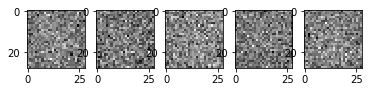

In [25]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    fig, axes = plt.subplots(1,5)
    for i,ax in enumerate(axes.flat):
        template = tf.transpose(weights['in'][:,i])
        template = template.eval()
        template = template/np.max(template)
        template = template.reshape((28,28))
        ax.imshow(template, cmap = 'binary')
        #plt.show()

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


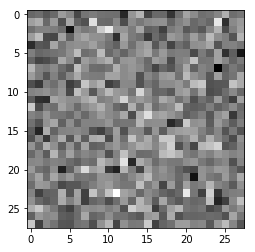

In [26]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,0])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


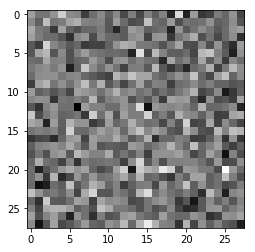

In [27]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,1])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


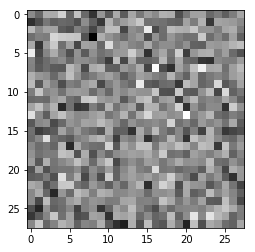

In [28]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,2])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


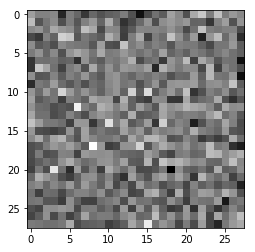

In [29]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,3])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


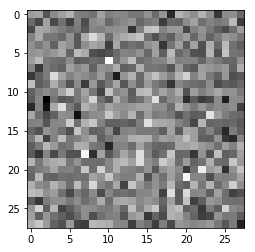

In [30]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,4])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [31]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,5])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder4.1.ckpt


ValueError: slice index 5 of dimension 1 out of bounds. for 'strided_slice_46' (op: 'StridedSlice') with input shapes: [784,5], [2], [2], [2] and with computed input tensors: input[1] = <0 5>, input[2] = <0 6>, input[3] = <1 1>.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,6])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder4.1.ckpt')
    template = tf.transpose(weights['in'][:,7])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder3.1.ckpt')
    template = tf.transpose(weights['in'][:,8])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder3.1.ckpt')
    template = tf.transpose(weights['in'][:,9])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder3.1.ckpt')
    template = tf.transpose(weights['in'][:,98])
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder3.1.ckpt')
    
    for epoch in range(num_epochs):
        _, cost1, cost = sess.run([train_op1, loss_op1, loss_op], feed_dict={x:mnist.train.images})
        print('after '+str(epoch+1201)+' epochs '+'error cost is '+str(cost)+','+'sparse encoding cost is '+str(cost1))
    save_path = saver.save(sess, '/tmp/sparse_encoder3.1.ckpt')